In [1]:
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.table import Table
from astropy.coordinates import SkyCoord
from matplotlib.patches import Circle

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import astropy.constants as const

from regions import CirclePixelRegion, CircleSkyRegion, PixCoord

from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

In [2]:
def calc_Noverg(line_flux, line_name):
    line_dict = {'H2_10_S2':[3.98e-7, 2.0338, 7584], 'H2_10_S1':[3.47e-7, 2.1218, 6956],
                'H2_10_S0':[2.53e-7, 2.2235, 6471], 'H2_21_S1':[4.98e-7, 2.2477, 12550],
                'H2_21_S2':[5.60e-7, 2.1542, 13150]}
    
    line_A, line_wave, Eupper = line_dict[line_name]
    Noverg = 4*np.pi*(line_wave*u.micron)/(const.h * const.c) * (line_flux*u.erg/u.s/(u.cm**2)) / (line_A/u.s)
    
    Noverg = Noverg.decompose().to(u.cm**-2)
    
    return Noverg, Eupper

In [4]:
nifs_fl = fits.open('/Users/jotter/highres_PSBs/ngc1266_NIFS/fit_output/c3_run3_gaussfit_maps.fits')

nifs_maps = nifs_fl[0].data
nifs_header = nifs_fl[0].header
nifs_wcs = WCS(nifs_header).celestial
nifs_fl.close()

map_shape = nifs_maps[0,:,:].shape

H2_10_S2_flux = maps[8,:,:]

H2_10_S1_flux = maps[11,:,:]
H2_10_S1_mask = maps[13,:,:]
H2_10_S1_bool = np.where(H2_10_S1_mask == 1, True, False)
H2_10_S1_flux_det = H2_10_S1_flux.copy()
H2_10_S1_flux_det[H2_10_S1_bool == False] = np.nan

H2_10_S0_flux = maps[14,:,:]
H2_21_S1_flux = maps[17,:,:]
H2_21_S2_flux = maps[20,:,:]
brgamma_flux = maps[23,:,:]
brgamma_mask = maps[25,:,:]
brgamma_bool = np.where(brgamma_mask == 1, True, False)
brgamma_flux_det = brgamma_flux.copy()
brgamma_flux_det[brgamma_bool == False] = np.nan

H2_21_S3_flux = maps[26,:,:]
H2_10_Q1_flux = maps[29,:,:]

In [5]:
z = 0.007214

D_L = cosmo.luminosity_distance(z).to(u.Mpc)
as_per_kpc = cosmo.arcsec_per_kpc_comoving(z)

as_in_125pc = 0.125 * as_per_kpc.value


#for aperture photometry
gal_cen = SkyCoord(ra='3:16:00.8974', dec='-2:25:37.623', unit=(u.hourangle, u.degree),
                  frame='fk5') #eyeballed from ds9, fk5

center_pix = nifs_wcs.all_world2pix(gal_cen.ra, gal_cen.dec, 0)
aperture_radius = 0.5*u.arcsecond
aperture_radius_pix = (aperture_radius / (0.043*u.arcsecond)).decompose()

print(aperture_radius / as_per_kpc)

0.07477166990292389 kpc


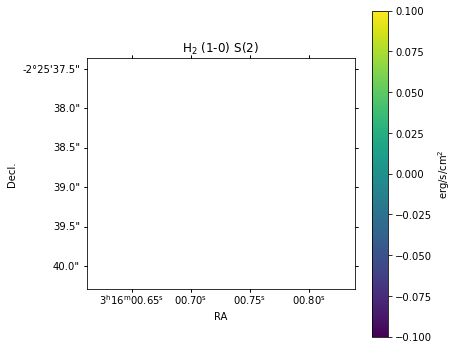

In [6]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(H2_10_S2_flux_det)

ap_patch = Circle(center_pix, aperture_radius_pix, fill=None, edgecolor='tab:red')
ax0.add_patch(ap_patch)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(2)')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

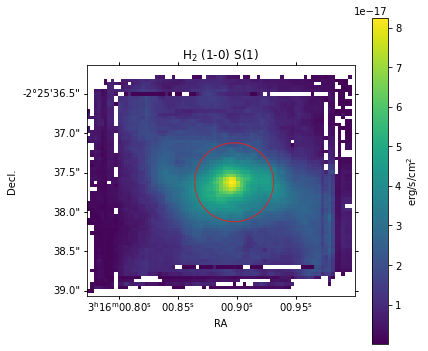

In [46]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(H2_10_S1_flux_det)#, vmax=3, vmin=0)

ap_patch = Circle(center_pix, aperture_radius_pix, fill=None, edgecolor='tab:red')
ax0.add_patch(ap_patch)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(1)')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

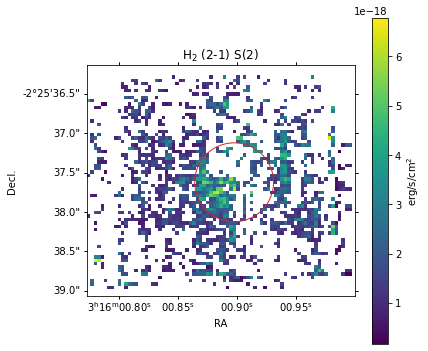

In [5]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(H2_21_S2_flux_det)

ap_patch = Circle(center_pix, aperture_radius_pix, fill=None, edgecolor='tab:red')
ax0.add_patch(ap_patch)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (2-1) S(2)')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

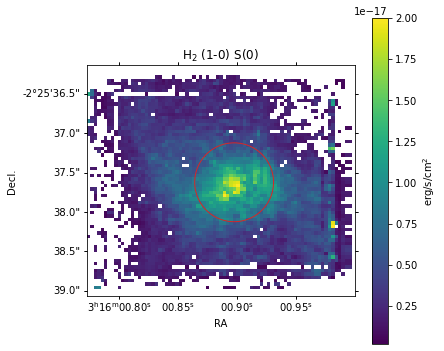

In [47]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(H2_10_S0_flux_det, vmax=2e-17)

ap_patch = Circle(center_pix, aperture_radius_pix, fill=None, edgecolor='tab:red')
ax0.add_patch(ap_patch)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(0)')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

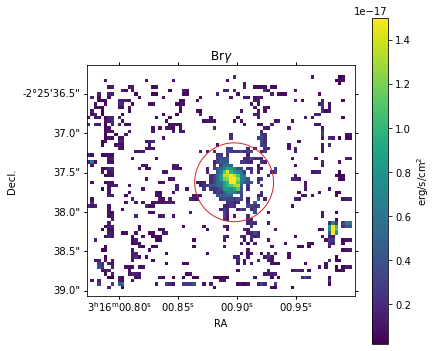

In [48]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)


#brgamma_masked = brgamma_flux
#brgamma_masked[np.logical_not(brgamma_bool)] = np.nan
mappable = ax0.imshow(brgamma_flux_det, vmax=1.5e-17)#, vmin=5)

ap_patch = Circle(center_pix, aperture_radius_pix, fill=None, edgecolor='tab:red')
ax0.add_patch(ap_patch)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'Br$\gamma$')

plt.colorbar(mappable, label=r'erg/s/cm$^2$')

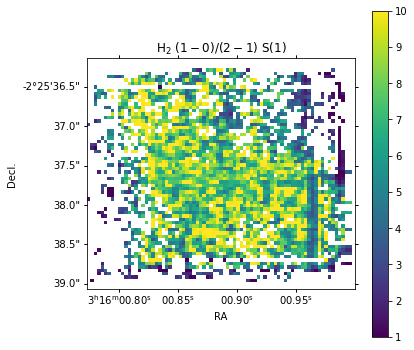

In [49]:
S1_ratio = H2_10_S1_flux_det/H2_21_S1_flux_det

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(S1_ratio, vmax=10, vmin=1)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ $(1-0)/(2-1)$ S(1)')

plt.colorbar(mappable)

#plt.savefig('plots/H2_S1_ratio_plot.png', dpi=300)

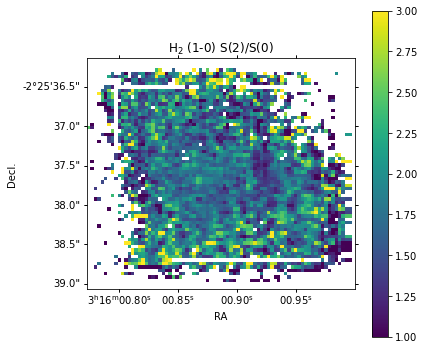

In [50]:
S20_ratio = H2_10_S2_flux_det/H2_10_S0_flux_det

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(S20_ratio, vmax=3, vmin=1)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(2)/S(0)')

plt.colorbar(mappable)

#plt.savefig('plots/H2_10_ratio_plot.png', dpi=300)

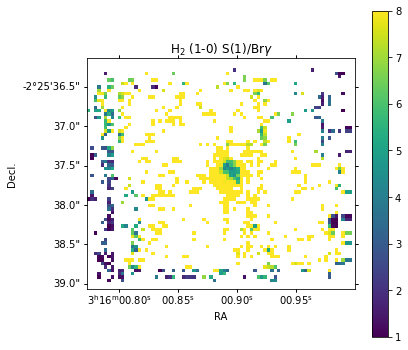

In [51]:
H2br_ratio = H2_10_S1_flux_det/brgamma_flux_det

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection=nifs_wcs)
mappable = ax0.imshow(H2br_ratio, vmax=8, vmin=1)

ax0.set_xlabel('RA')
ax0.set_ylabel('Decl.')

ax0.set_title(r'H$_2$ (1-0) S(1)/Br$\gamma$')

plt.colorbar(mappable)

#plt.savefig('plots/H2_10_ratio_plot.png', dpi=300)

In [52]:
U19 = ascii.read('/Users/jotter/highres_PSBs/tables/U19_tab2.txt')
#U19

In [57]:
center_pixcoord = PixCoord(center_pix[0], center_pix[1])

ap = CirclePixelRegion(center=center_pixcoord, radius=aperture_radius_pix.value)
ap_mask = ap.to_mask()
mask_img = ap_mask.to_image(map_shape)

H2_10_S2_flux_ctr = np.nansum(mask_img * H2_10_S2_flux_det)
H2_10_S2_nspax = np.nansum(mask_img * H2_10_S2_bool)
H2_10_S1_flux_ctr = np.nansum(mask_img * H2_10_S1_flux_det)
H2_10_S1_nspax = np.nansum(mask_img * H2_10_S2_bool)
H2_10_S0_flux_ctr = np.nansum(mask_img * H2_10_S0_flux_det)
H2_10_S0_nspax = np.nansum(mask_img * H2_10_S2_bool)
H2_21_S1_flux_ctr = np.nansum(mask_img * H2_21_S1_flux_det)
H2_21_S1_nspax = np.nansum(mask_img * H2_10_S2_bool)
H2_21_S2_flux_ctr = np.nansum(mask_img * H2_21_S2_flux_det)
H2_21_S2_nspax = np.nansum(mask_img * H2_10_S2_bool)
brgamma_flux_ctr = np.nansum(mask_img * brgamma_flux_det)
brgamma_nspax = np.nansum(mask_img * brgamma_bool)

aperture_radius2 = 1.5*u.arcsecond
aperture_radius_pix2 = (aperture_radius2 / (0.043*u.arcsecond)).decompose()

ap2 = CirclePixelRegion(center=center_pixcoord, radius=aperture_radius_pix2.value)
ap_mask2 = ap2.to_mask()
mask_img2 = ap_mask2.to_image(map_shape)

mask_img_otr = np.logical_and(mask_img2, np.logical_not(mask_img))

H2_10_S2_flux_otr = np.nansum(mask_img_otr * H2_10_S2_flux_det)
H2_10_S1_flux_otr = np.nansum(mask_img_otr * H2_10_S1_flux_det)
H2_10_S0_flux_otr = np.nansum(mask_img_otr * H2_10_S0_flux_det)
H2_21_S1_flux_otr = np.nansum(mask_img_otr * H2_21_S1_flux_det)
H2_21_S2_flux_otr = np.nansum(mask_img_otr * H2_21_S2_flux_det)
brgamma_flux_otr = np.nansum(mask_img_otr * brgamma_flux_det)

ratio_21_10_otr = H2_21_S1_flux_otr/H2_10_S1_flux_otr
ratio_21_10_ctr = H2_21_S1_flux_ctr/H2_10_S1_flux_ctr

ratio_s2s0_otr = H2_10_S2_flux_otr/H2_10_S0_flux_otr
ratio_s2s0_ctr = H2_10_S2_flux_ctr/H2_10_S0_flux_ctr


0.12774772767047396 1.6387173514971807


/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_19767/2838279723.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ratio_s2s0 = ratio_s2s1/ratio_s0s1
/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_19767/2838279723.py:17: RuntimeWarning: divide by zero encountered in true_divide
  e_ratio_s2s0 = ratio_s2s0 * np.sqrt((e_ratio_s2s1/ratio_s2s1)**2 + (e_ratio_s0s1/ratio_s0s1)**2)


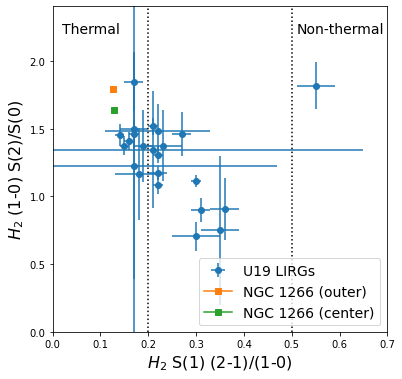

In [58]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

ratio_21_10 = U19['2-1_S(1)/1-0_S(1)']
e_ratio_21_10 = U19['e_2-1_S(1)/1-0_S(1)']

noulim_ind_21 = np.where(e_ratio_21_10 > 0)

ratio_s2s1 = U19['1-0_S(2)/1-0_S(1)']
e_ratio_s2s1 = U19['e_1-0_S(2)/1-0_S(1)']

ratio_s0s1 = U19['1-0_S(0)/1-0_S(1)']
e_ratio_s0s1 = U19['e_1-0_S(0)/1-0_S(1)']

ratio_s2s0 = ratio_s2s1/ratio_s0s1
e_ratio_s2s0 = ratio_s2s0 * np.sqrt((e_ratio_s2s1/ratio_s2s1)**2 + (e_ratio_s0s1/ratio_s0s1)**2)

noulim_ind_s2s1 = np.where(e_ratio_s2s1 > 0)
noulim_ind_s0s1 = np.where(e_ratio_s0s1 > 0)
noulim_ind_s2s0 = np.intersect1d(noulim_ind_s2s1, noulim_ind_s0s1)

noulim_ind = np.intersect1d(noulim_ind_21, noulim_ind_s2s0)

ax.errorbar(ratio_21_10[noulim_ind], ratio_s2s0[noulim_ind], xerr=e_ratio_21_10[noulim_ind], yerr=e_ratio_s2s0[noulim_ind],
            marker='o', linestyle='', label='U19 LIRGs')

ax.errorbar(ratio_21_10_otr, ratio_s2s0_otr, marker='s', label='NGC 1266 (outer)')
ax.errorbar(ratio_21_10_ctr, ratio_s2s0_ctr, marker='s', label='NGC 1266 (center)')

ax.set_xlabel(r'$H_2$ S(1) (2-1)/(1-0)', fontsize=16)
ax.set_ylabel(r'$H_2$ (1-0) S(2)/S(0)', fontsize=16)

plt.legend(fontsize=14, loc='lower right')

ax.set_xlim(0,0.7)
ax.set_ylim(0,2.4)

ax.axvline(0.2, linestyle='dotted', color='k')
ax.axvline(0.5, linestyle='dotted', color='k')

ax.text(0.02, 2.2, 'Thermal', fontsize=14)
ax.text(0.51, 2.2, 'Non-thermal', fontsize=14)

print(ratio_21_10_ctr, ratio_s2s0_ctr)

/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_19767/1094326082.py:1: RuntimeWarning: divide by zero encountered in true_divide
  Tvib = 5600/np.log(1.355 / ratio_21_10)


(500.0, 3000.0)

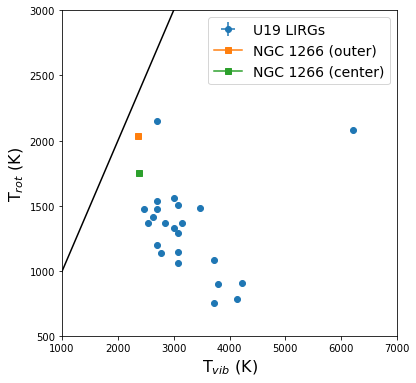

In [59]:
Tvib = 5600/np.log(1.355 / ratio_21_10)
Trot = -1113/np.log(0.323 * ratio_s2s0)

Tvib_ctr = 5600/np.log(1.355 / ratio_21_10_ctr)
Trot_ctr = -1113/np.log(0.323 * ratio_s2s0_ctr)
Tvib_otr = 5600/np.log(1.355 / ratio_21_10_otr)
Trot_otr = -1113/np.log(0.323 * ratio_s2s0_otr)

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

ax.errorbar(Tvib[noulim_ind], Trot[noulim_ind], xerr=0, yerr=0,
            marker='o', linestyle='', label='U19 LIRGs')

ax.errorbar(Tvib_otr, Trot_otr, marker='s', label='NGC 1266 (outer)')
ax.errorbar(Tvib_ctr, Trot_ctr, marker='s', label='NGC 1266 (center)')

ax.set_xlabel(r'T$_{vib}$ (K)', fontsize=16)
ax.set_ylabel(r'T$_{rot}$ (K)', fontsize=16)

plt.legend(fontsize=14, loc='upper right')

ax.plot([0,10000], [0,10000], marker='', linestyle='-', color='k')

ax.set_xlim(1000,7000)
ax.set_ylim(500,3000)

/var/folders/vf/84glvj217td2j5kktzkvgpqr0000gn/T/ipykernel_19767/4249130572.py:1: RuntimeWarning: invalid value encountered in true_divide
  H2_brgamma_lirgs = U19['H2_1-0_S(1)_Flux']/U19['Brgamma_Flux']


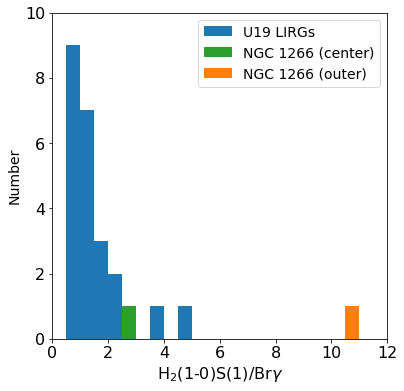

In [60]:
H2_brgamma_lirgs = U19['H2_1-0_S(1)_Flux']/U19['Brgamma_Flux']
H2_brgamma_ctr = H2_10_S0_flux_ctr/brgamma_flux_ctr
H2_brgamma_otr = H2_10_S0_flux_otr/brgamma_flux_otr

full_H2_brgamma = np.concatenate((H2_brgamma_lirgs, [H2_brgamma_ctr, H2_brgamma_otr]))
bins = np.arange(0,11.5,0.5)
full_H2_brgamma_hist, full_bins = np.histogram(full_H2_brgamma, bins)

fig = plt.figure(figsize=(6,6))

plt.bar(bins[0:-1], full_H2_brgamma_hist, align='edge', width=0.5, label='U19 LIRGs')


plt.bar([2.5], [1], align='edge', width=0.5, color='tab:green', label='NGC 1266 (center)')
plt.bar([10.5], [1], align='edge', width=0.5, color='tab:orange', label='NGC 1266 (outer)')

plt.ylabel('Number', fontsize=14)
plt.xlabel(r'H$_2$(1-0)S(1)/Br$\gamma$', fontsize=16)

plt.tick_params(labelsize=16)

plt.xlim(0,12)
plt.ylim(0,10)

plt.legend(fontsize=14)


596392.7737496394 1 / cm2
[7584, 6956, 6471, 12550, 13150]


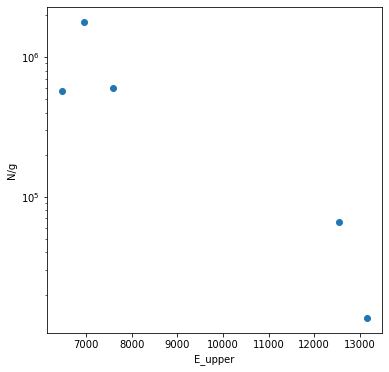

In [81]:
#excitation diagram
#extract excitation properties in center

Noverg_10_S2, Eu_10_S2 = calc_Noverg(H2_10_S2_flux_ctr, 'H2_10_S2')
Noverg_10_S1, Eu_10_S1 = calc_Noverg(H2_10_S1_flux_ctr, 'H2_10_S1')
Noverg_10_S0, Eu_10_S0 = calc_Noverg(H2_10_S0_flux_c
                                     tr, 'H2_10_S0')

Noverg_21_S1, Eu_21_S1 = calc_Noverg(H2_21_S1_flux_ctr, 'H2_21_S1')
Noverg_21_S2, Eu_21_S2 = calc_Noverg(H2_21_S2_flux_ctr, 'H2_21_S2')

fig = plt.figure(figsize=(6,6))
print(Noverg_10_S2)
level_pops = [Noverg_10_S2.value, Noverg_10_S1.value, Noverg_10_S0.value, Noverg_21_S1.value, Noverg_21_S2.value]
energy_lvls = [Eu_10_S2, Eu_10_S1, Eu_10_S0, Eu_21_S1, Eu_21_S2]

plt.plot(energy_lvls, level_pops, marker='o', linestyle='')
plt.semilogy()

plt.ylabel('N/g')

plt.xlabel('E_upper')

print(energy_lvls)

# Calculated quantities

In [62]:
#hot gas mass - from Mazzalay 2013
A_22 = 0 #assume no extinction
Mh2_M13 = 5.0776e13 * H2_10_S1_flux_ctr * (D_L.value**2) * (10**(0.4*A_22))

Mh2_D15 = 5.08 * ((H2_10_S1_flux_ctr * u.erg/u.s/u.cm**2).to(u.W/u.m**2)).value * 1e16 * (D_L.value**2)

Mh2_full = 5.0776e13 * np.nansum(H2_10_S1_flux_det) * (D_L.value**2) * (10**(0.4*A_22))

In [63]:
Mh2_M13, Mh2_D15, Mh2_full

(889.0665027802307, 889.4867327327028, 3405.375822154675)

In [64]:
#SFR from Brgamma - from U19 eq 4

L_brgamma = ((brgamma_flux_ctr *u.erg/u.s/u.cm**2)* 4 * np.pi * D_L**2).to(u.erg/u.s)
L_brgamma_total = ((np.nansum(brgamma_flux_det) *u.erg/u.s/u.cm**2)* 4 * np.pi * D_L**2).to(u.erg/u.s)

SFR = 8.2e-40 * L_brgamma.value #Msun/yr
SFR_total = 8.2e-40 * L_brgamma_total.value #Msun/yr

In [65]:
SFR, SFR_total #should be a lower limit bc we don't have a good extinction estimate

(0.08708378312232297, 0.17976851758292156)

In [69]:
#aperture area
aperture_radius_kpc = aperture_radius/as_per_kpc
aperture_area_kpc2 = np.pi * aperture_radius_kpc**2

Sigma_SFR_center = SFR/aperture_area_kpc2.value

In [71]:
Sigma_SFR_center, np.log10(Sigma_SFR_center) #Msun/yr/kpc^2

(4.958076859054716, 0.6953132548248292)

In [75]:
#total NIR H2 luminosity:
L_H2_10_S0 = ((H2_10_S0_flux_ctr *u.erg/u.s/u.cm**2)* 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_10_S1 = ((H2_10_S1_flux_ctr *u.erg/u.s/u.cm**2)* 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_10_S2 = ((H2_10_S2_flux_ctr *u.erg/u.s/u.cm**2)* 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_21_S1 = ((H2_10_S1_flux_ctr *u.erg/u.s/u.cm**2)* 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_21_S2 = ((H2_10_S2_flux_ctr *u.erg/u.s/u.cm**2)* 4 * np.pi * D_L**2).to(u.erg/u.s)

L_H2 = L_H2_10_S0 + L_H2_10_S1 + L_H2_10_S2 + L_H2_21_S1 + L_H2_21_S2

In [76]:
L_H2

<Quantity 6.37312204e+39 erg / s>

In [78]:
#Spitzer H2 luminosities from Roussel 2017:
L_H2_MIR_S0 = ((16.4e-18 * u.W/u.m**2) * 4 * np.pi * D_L**2).to(u.erg/u.s) 
L_H2_MIR_S1 = ((148.5e-18 * u.W/u.m**2) * 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_MIR_S2 = ((121.8e-18 * u.W/u.m**2) * 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_MIR_S3 = ((189.8e-18 * u.W/u.m**2) * 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_MIR_S4 = ((102.7e-18 * u.W/u.m**2) * 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_MIR_S5 = ((241.9e-18 * u.W/u.m**2) * 4 * np.pi * D_L**2).to(u.erg/u.s)
L_H2_MIR_S6 = ((18.5e-18 * u.W/u.m**2) * 4 * np.pi * D_L**2).to(u.erg/u.s) #this one is a lower limit
L_H2_MIR_S7 = ((192.2e-18 * u.W/u.m**2) * 4 * np.pi * D_L**2).to(u.erg/u.s)

L_H2_MIR = L_H2_MIR_S0 + L_H2_MIR_S1 + L_H2_MIR_S2 + L_H2_MIR_S3 + L_H2_MIR_S4 + L_H2_MIR_S5 + L_H2_MIR_S6 + L_H2_MIR_S7

In [79]:
L_H2_MIR

<Quantity 1.19161072e+41 erg / s>

In [ ]:
#Alatalo 2015 - E_kin = 2.4e55 erg